In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Importing Data

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]


5

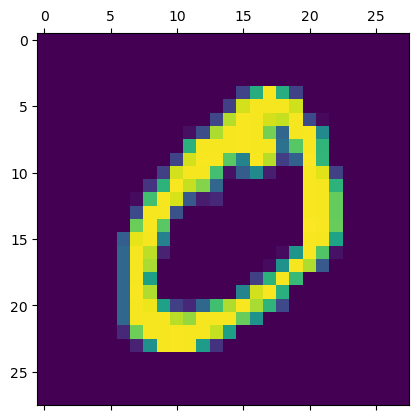

In [9]:
plt.matshow(x_train[1])

In [10]:
y_train[1]

0

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_test_flattened.shape

(10000, 784)

## Building and Testing model

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4682 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 979us/step - loss: 0.2669 - accuracy: 0.9253


In [16]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2696 - accuracy: 0.9252


[0.269618421792984, 0.9251999855041504]

## Testing

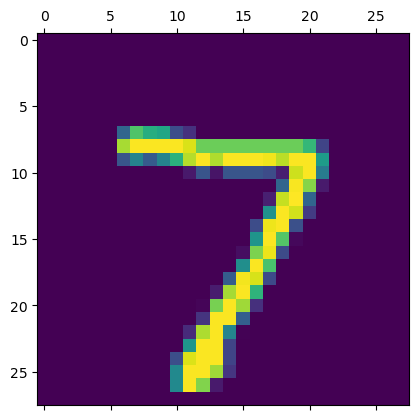

In [17]:
plt.matshow(x_test[0])

In [18]:
y_hat = model.predict(x_test_flattened)

313/313 [==============================] - 0s 859us/step


In [19]:
y_hat[0]

array([2.1209173e-02, 4.3643428e-07, 4.9341932e-02, 9.3399256e-01,
       1.8216661e-03, 1.1273272e-01, 1.2217317e-06, 9.9968565e-01,
       9.4176687e-02, 7.3584163e-01], dtype=float32)

## Result

In [20]:
np.argmax(y_hat[0])

7

## One more testing

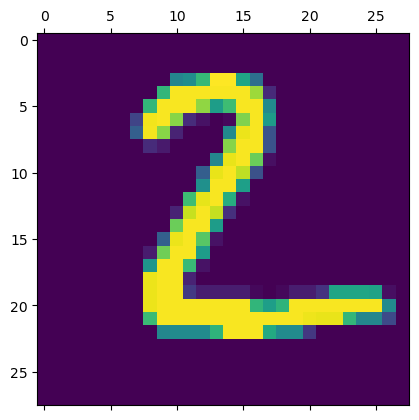

In [21]:
plt.matshow(x_test[1])

In [22]:
np.argmax(y_hat[1])

2

In [23]:
y_hat_labels = [np.argmax(i) for i in y_hat]
y_hat_labels[:3]

[7, 2, 1]

## Improving the model's accuracy 

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_hat_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    1,    0,    7,    5,    3,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,   10,  906,   17,    9,    6,   13,   11,   49,    4],
       [   3,    0,   14,  909,    0,   30,    3,   11,   32,    8],
       [   1,    1,    3,    1,  907,    0,   12,    4,   10,   43],
       [   7,    2,    1,   16,    9,  798,   12,    5,   34,    8],
       [  10,    3,    5,    1,    7,   17,  910,    2,    3,    0],
       [   1,    7,   20,    7,    7,    1,    0,  940,    5,   40],
       [   5,    9,    5,   15,    9,   24,    8,   11,  879,    9],
       [   9,    7,    1,    6,   20,    8,    0,   15,    9,  934]])>

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_hat_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    1,    0,    7,    5,    3,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,   10,  906,   17,    9,    6,   13,   11,   49,    4],
       [   3,    0,   14,  909,    0,   30,    3,   11,   32,    8],
       [   1,    1,    3,    1,  907,    0,   12,    4,   10,   43],
       [   7,    2,    1,   16,    9,  798,   12,    5,   34,    8],
       [  10,    3,    5,    1,    7,   17,  910,    2,    3,    0],
       [   1,    7,   20,    7,    7,    1,    0,  940,    5,   40],
       [   5,    9,    5,   15,    9,   24,    8,   11,  879,    9],
       [   9,    7,    1,    6,   20,    8,    0,   15,    9,  934]])>

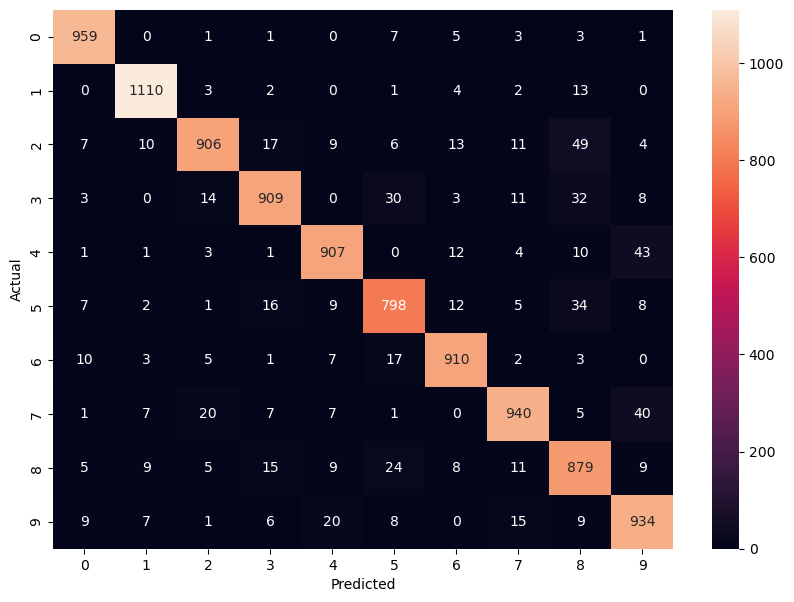

In [26]:
import seaborn as sns
plt.figure(figsize= (10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2384 - accuracy: 0.9317
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1003 - accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0661 - accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0477 - accuracy: 0.9847
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0358 - accuracy: 0.9885


In [28]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9768


[0.07204367220401764, 0.9768000245094299]

313/313 [==============================] - 0s 803us/step


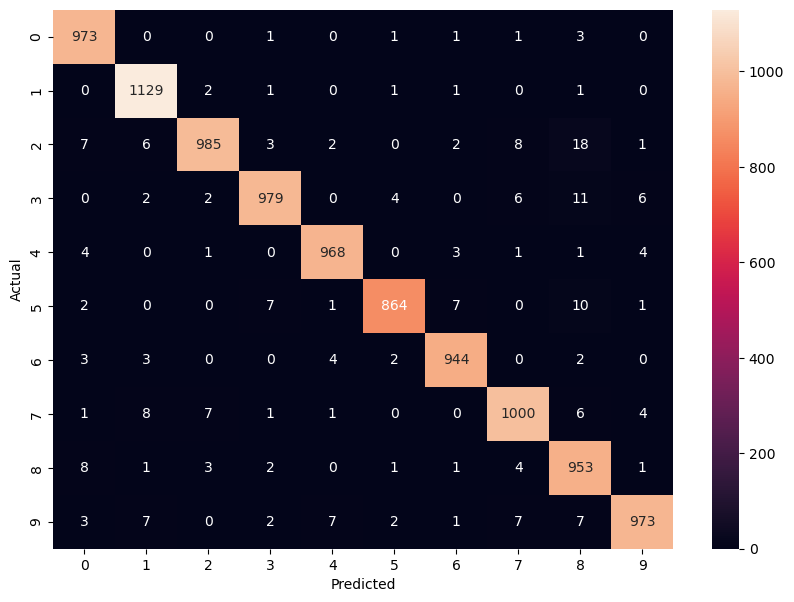

In [29]:
y_hat = model.predict(x_test_flattened)
y_hat_labels = [np.argmax(i) for i in y_hat]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_hat_labels)


plt.figure(figsize= (10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(10,activation='relu')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2614 - accuracy: 0.1379
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2263 - accuracy: 0.1369
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2380 - accuracy: 0.1271
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2510 - accuracy: 0.1212
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2667 - accuracy: 0.1143


In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2305 - accuracy: 0.9341
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0987 - accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0650 - accuracy: 0.9804
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0486 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0358 - accuracy: 0.9888


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adagrad',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)